# LEARNING PYSPARK

#  Apache Spark, Spark & PySpark

**Apache Spark**
An open-source distributed computing system for fast, large-scale data processing across multiple machines.

**Spark**
The core engine of Apache Spark that handles data processing, transformations, and analytics efficiently.

**PySpark**
The Python API for Spark, enabling you to write Spark applications in Python.

Work with DataFrames, SQL, machine learning, and streaming

Perform distributed data processing like Pandas but on big data

***Why use it?***

Process datasets larger than memory

Build data pipelines, analytics, and ML workflows

Combine speed, scalability, and simplicity

1. `INSTALL AND INITIALIZE PYSPARK`

In [ ]:
!pip install pyspark

**1. SparkSession**

The entry point to use Apache Spark in PySpark.

It connects your Python code with the Spark engine running in the background.

You need it to create DataFrames, read data files, and run SQL or transformations.


**2. pyspark.sql**

A module inside PySpark used for working with structured data (rows + columns).

It contains:

SparkSession → to start Spark

functions → ready-made SQL-style functions (col, when, count, etc.)

types → to define column data types and schemas.

Basically, it lets you treat big data like a database table and use SQL-like operations in Python.


**3. Spark**

Short for Apache Spark, a distributed data-processing framework that can handle very large datasets by splitting the work across multiple machines.

PySpark is the Python interface to interact with that system.

Spark takes your code, optimizes it, and runs it in parallel on many machines if available.

Even in Colab, it simulates that environment locally.

In [3]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Create a Spark session
spark = SparkSession.builder \
    .appName("PySpark_Intern_Practice") \
    .getOrCreate()

# Check Spark version
print("Spark Version:", spark.version)

Spark Version: 3.5.1


`2. CREATE A SAMPLE DATASET`

In [4]:
# Sample in-memory data
data = [
    (1, "Alice", 28, "Data Engineer", 85000),
    (2, "Bob", 35, "Data Scientist", 125000),
    (3, "Cathy", 29, "Data Analyst", 72000),
    (4, "David", 42, "Manager", 150000),
    (5, "Evelyn", 30, "ML Engineer", 115000)
]

#Define schema
schema=StructType([
    StructField("id",IntegerType(),True),
    StructField("name",StringType(),True),
    StructField("age",IntegerType(),True),
    StructField("role",StringType(),True),
    StructField("salary",IntegerType(),True)
])

#creating dataframe
df=spark.createDataFrame(data,schema=schema)
df.show()

+---+------+---+--------------+------+
| id|  name|age|          role|salary|
+---+------+---+--------------+------+
|  1| Alice| 28| Data Engineer| 85000|
|  2|   Bob| 35|Data Scientist|125000|
|  3| Cathy| 29|  Data Analyst| 72000|
|  4| David| 42|       Manager|150000|
|  5|Evelyn| 30|   ML Engineer|115000|
+---+------+---+--------------+------+



`3. BASIC DATAFRAME OPERATIONS`

Schema is the blueprint of the database.

root shows the starting point of the schema, and the column header order follows;

nullable = true states that these particular columns are allowed to contain null values.

In [5]:
#Print Schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- role: string (nullable = true)
 |-- salary: integer (nullable = true)



In [7]:
#select specific columns
df.select("name","salary").show() #show() diplays first 20 rows by default for spark df

+------+------+
|  name|salary|
+------+------+
| Alice| 85000|
|   Bob|125000|
| Cathy| 72000|
| David|150000|
|Evelyn|115000|
+------+------+



In [8]:
#filter data
df.filter(df.age>30).show()

+---+-----+---+--------------+------+
| id| name|age|          role|salary|
+---+-----+---+--------------+------+
|  2|  Bob| 35|Data Scientist|125000|
|  4|David| 42|       Manager|150000|
+---+-----+---+--------------+------+



In [10]:
#adds a new column
df=df.withColumn("bonus",df.salary * 0.1) #withColumn is not run automatically, but plan is created

**df = df.withColumn("bonus", df.salary * 0.1 explanation.**



df.salary*0.1 creates a column object that is not yet attatched to df yet.

withColumn adds a new col or udate an existing col.

bonus is the new column name given.



***Spark does lazy optimization.***



in this case, it is done in  df=df.withColumn('bonus',df.salary*0.1) step .

 Since DATAFRAMES ARE IMMUTABLE , df.salary*0.1(column object) is created instead of a column(salary*0.1).

here, adding a new column doesn't also require copying the original df to memory inorder to add it to new df;(therefore memory is optimized).

instead, it just plans on what to do and only executes plan when asked ;for eg: df.show()





In [12]:
df.show() # only now,plan is executed by adding column + reading from the old df for old values

+---+------+---+--------------+------+-------+
| id|  name|age|          role|salary|  bonus|
+---+------+---+--------------+------+-------+
|  1| Alice| 28| Data Engineer| 85000| 8500.0|
|  2|   Bob| 35|Data Scientist|125000|12500.0|
|  3| Cathy| 29|  Data Analyst| 72000| 7200.0|
|  4| David| 42|       Manager|150000|15000.0|
|  5|Evelyn| 30|   ML Engineer|115000|11500.0|
+---+------+---+--------------+------+-------+



In [19]:
#drop column
df=df.drop("bonus")

In [17]:
df.show()

+---+------+---+--------------+------+
| id|  name|age|          role|salary|
+---+------+---+--------------+------+
|  1| Alice| 28| Data Engineer| 85000|
|  2|   Bob| 35|Data Scientist|125000|
|  3| Cathy| 29|  Data Analyst| 72000|
|  4| David| 42|       Manager|150000|
|  5|Evelyn| 30|   ML Engineer|115000|
+---+------+---+--------------+------+



`4. AGGREGATIONS & GROUPING`

In [21]:
#groups role and takes avg salary by role, since all roles are unique, no significant grouping is done, hence each rows avg salary is taken
df.groupBy("role").agg(avg("salary").alias("avg_salary")).show()



+--------------+----------+
|          role|avg_salary|
+--------------+----------+
|Data Scientist|  125000.0|
| Data Engineer|   85000.0|
|  Data Analyst|   72000.0|
|   ML Engineer|  115000.0|
|       Manager|  150000.0|
+--------------+----------+



In [23]:
#max and min values
df.select(max("salary").alias("max_salary "),min("salary").alias("min_salary")).show()

+-----------+----------+
|max_salary |min_salary|
+-----------+----------+
|     150000|     72000|
+-----------+----------+



In [24]:
#count by role
df.groupby("role").count().show()

+--------------+-----+
|          role|count|
+--------------+-----+
|Data Scientist|    1|
| Data Engineer|    1|
|  Data Analyst|    1|
|   ML Engineer|    1|
|       Manager|    1|
+--------------+-----+



`5. SQL OPERATIONS(REGISTERING TEMP VIEWS)`

here, in df.createOrReplaceTempView("employees") , a temp database table is created so that spark can run SQL queries in it.

In [26]:
#register df as SQL temporary view
df.createOrReplaceTempView("employees") #employees is the temp table name

In [27]:
#run SQL queries
spark.sql("SELECT name,role,salary FROM employees WHERE salary>100000").show()
spark.sql("SELECT role, COUNT(*) AS total_people FROM employees GROUP BY role").show()

+------+--------------+------+
|  name|          role|salary|
+------+--------------+------+
|   Bob|Data Scientist|125000|
| David|       Manager|150000|
|Evelyn|   ML Engineer|115000|
+------+--------------+------+

+--------------+------------+
|          role|total_people|
+--------------+------------+
|Data Scientist|           1|
| Data Engineer|           1|
|  Data Analyst|           1|
|   ML Engineer|           1|
|       Manager|           1|
+--------------+------------+



`6. READING/WRITING DATA (SIMULATING ETL TASKS)`

/content-(directory); is colab's local storage

In [33]:
#write to csv
df.write.mode("overwrite").csv("/content/employees_csv")

header=True → treats first row as column header names

inferSchema=True → Automatically detect column types

> Add blockquote



In [38]:
#read back from csv
df_csv = spark.read.csv("/content/employees_csv", header=True, inferSchema=True)


here, headers got error because of the header=True; if csv was written by pyspark without a proper header , manually define it.

In [39]:
df_csv.show()

+---+------+---+--------------+------+
|  3| Cathy| 29|  Data Analyst| 72000|
+---+------+---+--------------+------+
|  4| David| 42|       Manager|150000|
|  5|Evelyn| 30|   ML Engineer|115000|
|  2|   Bob| 35|Data Scientist|125000|
+---+------+---+--------------+------+



In [40]:
columns = ["id", "name", "age", "role", "salary"]
df_csv = spark.read.csv("/content/employees_csv", header=False, inferSchema=True).toDF(*columns)
df_csv.show()

+---+------+---+--------------+------+
| id|  name|age|          role|salary|
+---+------+---+--------------+------+
|  3| Cathy| 29|  Data Analyst| 72000|
|  4| David| 42|       Manager|150000|
|  5|Evelyn| 30|   ML Engineer|115000|
|  1| Alice| 28| Data Engineer| 85000|
|  2|   Bob| 35|Data Scientist|125000|
+---+------+---+--------------+------+



`7. DATA ENGINEERING TASKS`

**a) Data Cleaning**

In [41]:
# Example: Handling missing values
data_with_null = [(1, "Alice", 28, None, 85000), (2, None, None, "Data Scientist", None)]
schema2 = StructType([
    StructField("id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("role", StringType(), True),
    StructField("salary", IntegerType(), True)
])

df2 = spark.createDataFrame(data_with_null, schema=schema2)

#fill null values
df2.fillna({"name": "Unknown", "age": 0, "salary": 0, "role": "Unassigned"}).show()


+---+-------+---+--------------+------+
| id|   name|age|          role|salary|
+---+-------+---+--------------+------+
|  1|  Alice| 28|    Unassigned| 85000|
|  2|Unknown|  0|Data Scientist|     0|
+---+-------+---+--------------+------+



**b) Data Transformation(ETL-style)**

The round() function here is from pyspark.sql.functions.

Syntax: round(column, scale)

In [42]:
# Example transformation pipeline
df_transformed = (
    df.withColumn("salary_in_lakhs", round(col("salary") / 100000, 2))
      .withColumn("seniority", when(col("age") > 35, "Senior").otherwise("Junior"))
      .select("name", "role", "salary_in_lakhs", "seniority")
)

df_transformed.show()

+------+--------------+---------------+---------+
|  name|          role|salary_in_lakhs|seniority|
+------+--------------+---------------+---------+
| Alice| Data Engineer|           0.85|   Junior|
|   Bob|Data Scientist|           1.25|   Junior|
| Cathy|  Data Analyst|           0.72|   Junior|
| David|       Manager|            1.5|   Senior|
|Evelyn|   ML Engineer|           1.15|   Junior|
+------+--------------+---------------+---------+



`9. CONVERT TO PANDAS FOR VISUALIZATION`

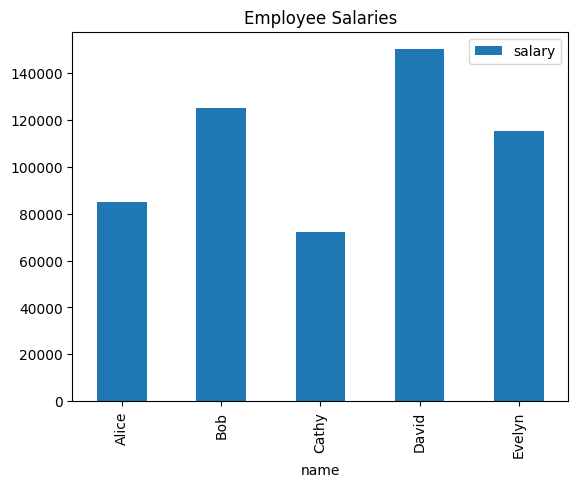

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pandas_df = df.toPandas()
pandas_df.plot(x='name',y='salary',kind='bar',title='Employee Salaries')
plt.show()

`10. CLEAN EXIT`

In [44]:
spark.stop()